In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.DataFrame({
    'x':np.array([0,1,2,3,4]),
    'y':np.array([2,5,3,4,6])
})
df.head()

,x,y
0,0,2
1,1,5
2,2,3
3,3,4
4,4,6


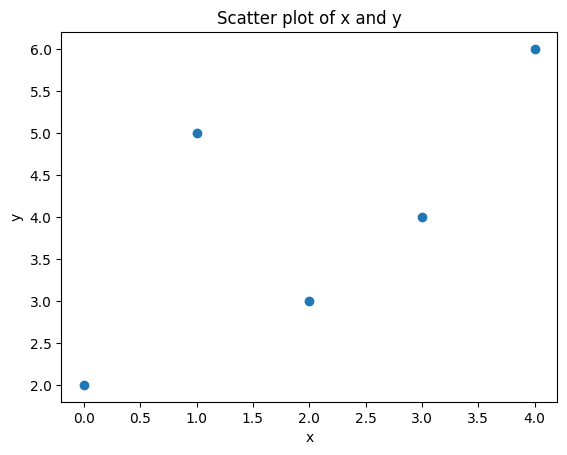

In [3]:
plt.scatter(df['x'],df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.show()

In [4]:
#Initial guess
m=1
c=0

Calculate y_pred

- y_1=1*0+0 = 0
- y_2=1*1+0 = 1
- y_3=1*2+0 = 2
- y_4=1*3+0 = 3
- y_5=1*4+0 = 4

Calculate the error

- e1= 2-0 =2
- e2= 5-1 =4
- e3= 3-2 =1
- e4= 4-3 =1
- e5= 6-4 =2

Text(0.5, 0, 'x')

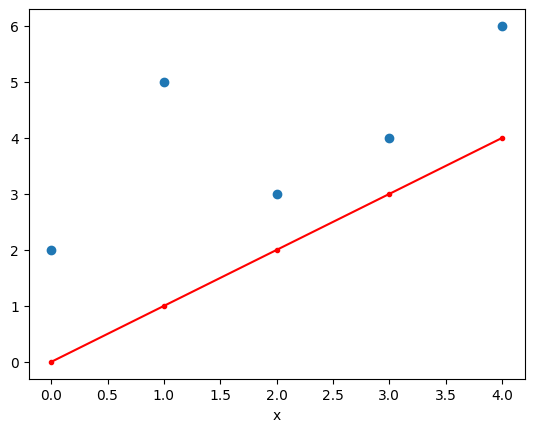

In [5]:
#Plot the initial guess
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],m*df['x']+c, color='red',marker='.')
plt.xlabel('x')

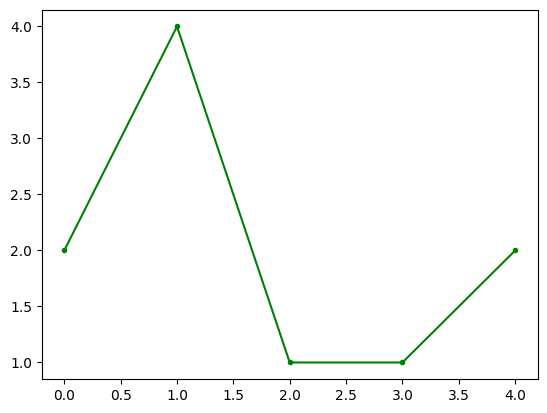

In [6]:
#plot the errror
plt.plot(df['x'],df['y']-(m*df['x']+c), color='green',marker='.')

In [7]:
learning_rate=0.01
epochs=1000
m=1
c=0

errors=[]

for i in range(epochs):
    #calculate the derivative of m and c
    dm=-2*sum(df['x']*(df['y']-(m*df['x']+c)))
    dc=-2*sum(df['y']-(m*df['x']+c))
    
    #update the m and c
    m=m-learning_rate*dm
    c=c-learning_rate*dc
    errors.append(sum(df['y']-(m*df['x']+c)))
    

In [8]:
print(f"Slope {m} and intercept {c}")

Slope 0.7000000000000585 and intercept 2.5999999999998336


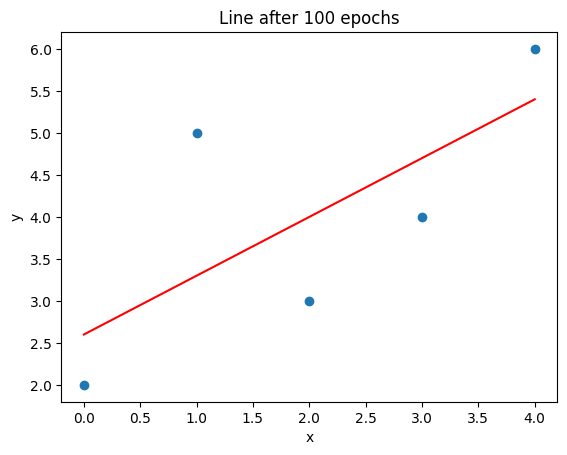

In [9]:
#Plot the final line
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],m*df['x']+c, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line after 100 epochs')
plt.show()


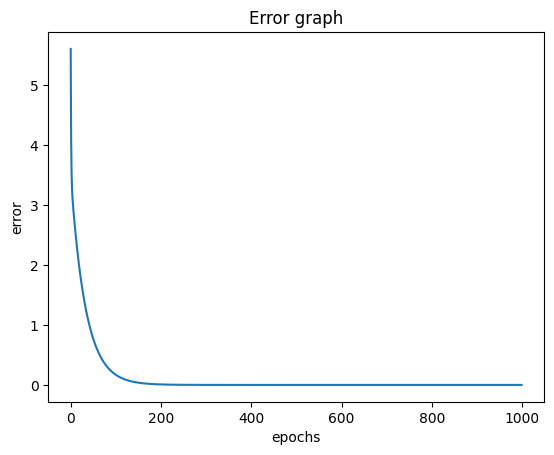

In [10]:
#Plot the error
plt.plot(errors)
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('Error graph')
plt.show()


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['x']],df['y'])
print(model.coef_)
print(model.intercept_)


[0.7]
2.5999999999999996


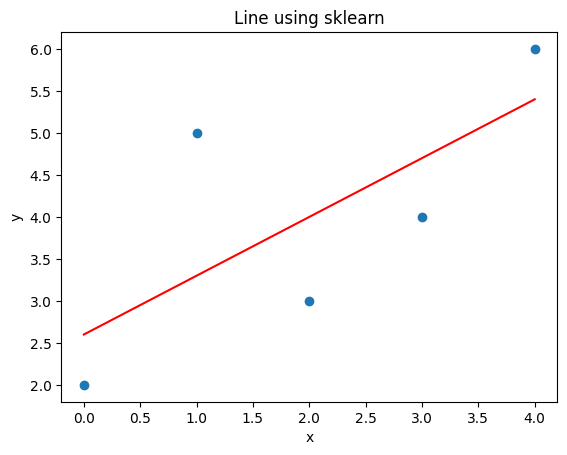

In [12]:
# Plot the line
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],model.predict(df[['x']]), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line using sklearn')
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create a plot and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of the data points
ax.scatter(df['x'], df['y'], color='blue', label='Data points')

# Initialize the line to be empty
line, = ax.plot([], [], color='red', label='Regression Line')

# Set the axis limits
ax.set_xlim(df['x'].min() - 1, df['x'].max() + 1)
ax.set_ylim(df['y'].min() - 1, df['y'].max() + 1)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Gradient Descent Convergence for Linear Regression')
ax.legend()

# Initialize m and c
m = np.random.randn()
c = np.random.randn()

# Store the history of m and c for animation
history_m = []
history_c = []

# Perform gradient descent for 100 iterations
iterations = 300
learning_rate = 0.001

for i in range(iterations):
    # Calculate gradients
    m_gradient = -2 * df['x'] * (df['y'] - (m * df['x'] + c))
    c_gradient = -2 * (df['y'] - (m * df['x'] + c))
    
    # Update weights
    m -= learning_rate * m_gradient.sum()
    c -= learning_rate * c_gradient.sum()
    
    # Store the updated m and c for animation
    history_m.append(m)
    history_c.append(c)

# Initialize the epoch text on the right of the plot
epoch_text = ax.text(1.05, 0.5, '', transform=ax.transAxes, ha='center', va='center', fontsize=12)

# Update function for animation
def update(frame):
    m, c = history_m[frame], history_c[frame]
    line.set_data(df['x'], m * df['x'] + c)
    
    # Update the epoch text
    epoch_text.set_text(f'Epoch: {frame+1}')
    
    return line, epoch_text

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(iterations), blit=True, interval=100)

# Display the animation in Jupyter
plt.close(fig)
ani.save('gradient_descent.gif', writer='imagemagick', fps=30)


MovieWriter imagemagick unavailable; using Pillow instead.
